# Objective

**Combine historical usage patterns with weather data in order to forecast bike rental demand 
in the Capital Bikeshare program in Washington, D.C

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city

In [1]:
# https://www.kaggle.com/c/bike-sharing-demand/overview

# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change working directory
%pwd
%cd C:\Users\aditi\OneDrive\Desktop\laptop_backup\study\kaggle\bike_rental
%pwd

C:\Users\aditi\OneDrive\Desktop\laptop_backup\study\kaggle\bike_rental


'C:\\Users\\aditi\\OneDrive\\Desktop\\laptop_backup\\study\\kaggle\\bike_rental'

In [3]:
# Read the input data
bike_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

## Exploratory Data Analysis

In [4]:
# Run below snippet to allow multiple outputs in one cell of python notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
bike_data.head()
bike_data.info()
bike_data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
test_data.head()
test_data.info()
test_data.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


On the basis of above information about datasets split the columns as numerical and categorical for further analysis

In [7]:
numeric_columns=['temp','atemp','humidity','windspeed','casual','registered','count']
cat_columns=['season','holiday','workingday','weather']

In [8]:
# Only obtain summary stats for numeric columns
bike_data[numeric_columns].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Only obtain number of unique values for categorical columns
bike_data[cat_columns].nunique()

season        4
holiday       2
workingday    2
weather       4
dtype: int64

In [10]:
# value_counts() is only available for pandas series and not dataframe 
# so train_data[cat_columns].value_counts() throws error
type(bike_data['season'])
bike_data['season'].value_counts()

pandas.core.series.Series

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [11]:
# Obtain value counts for each categorical columns
for i in cat_columns:
    print(i,'----->')
    print(bike_data[i].value_counts())
    print('*'*50)

season ----->
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
**************************************************
holiday ----->
0    10575
1      311
Name: holiday, dtype: int64
**************************************************
workingday ----->
1    7412
0    3474
Name: workingday, dtype: int64
**************************************************
weather ----->
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
**************************************************


## Missing Value analysis

In [12]:
# Check for missing values in data

bike_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

We are lucky to have no missing values in our dataset

## Outlier analysis

For outlier analysis we are going to look at the boxplots and distribution plots for the temperature, humidity & windspeed variable

In [13]:
# Let's call help on suplot to check the parameters

# help (plt.subplot)
    

In [14]:
# help(sns.boxplot)

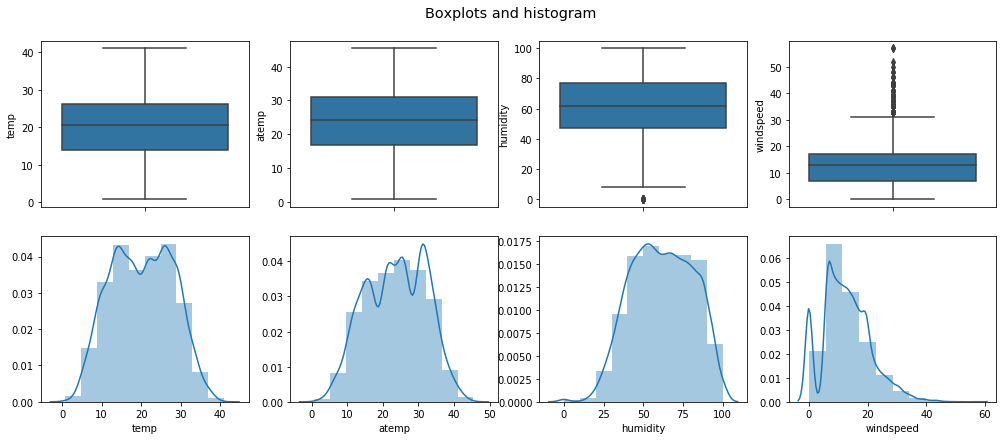

In [15]:
def boxplot_and_hist(col1,col2,col3,col4,input_data, bin1=10,bin2=20,bin3=30,bin4=30):
    fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(14,6))
    super_title=fig.suptitle('Boxplots and histogram', fontsize='x-large')
    plt.tight_layout()
    sns.boxplot(y = col1, data = input_data, ax = ax[0][0])
    sns.boxplot(y = col2, data = input_data, ax = ax[0][1])
    sns.boxplot(y = col3, data = input_data, ax = ax[0][2])
    sns.boxplot(y = col4, data = input_data, ax = ax[0][3])
    sns.distplot( input_data[col1], ax=ax[1][0],bins = bin1)
    sns.distplot( input_data[col2], ax=ax[1][1],bins = bin1)
    sns.distplot( input_data[col3], ax=ax[1][2],bins = bin1)
    sns.distplot( input_data[col4], ax=ax[1][3],bins = bin1)
    fig.subplots_adjust(top=0.9)
    plt.show()

    
boxplot_and_hist('temp','atemp','humidity','windspeed',bike_data)

There seem to be some outliers for humidity and windspeed and none for temp and a temp.
Given it's a weather data where outliers for windspeed are possible so let's be cautious and create both models with and without removing outliers and see how they perform. 

## Feature Engineering

In [16]:
type(bike_data['datetime'][0])
bike_data['datetime'][0]

# Ignore - Test snippet
from datetime import datetime
p=bike_data['datetime'][0]
y=datetime.strptime(p, "%Y-%m-%d %H:%M:%S")
print(y)
type(y)
print(y.year, y.month, y.day)

str

'2011-01-01 00:00:00'

2011-01-01 00:00:00


datetime.datetime

2011 1 1


In [17]:
from datetime import datetime

bike_data['month']=bike_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).month)
bike_data['year']=bike_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).year)
bike_data['weekday']=bike_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).weekday())

test_data['month']=test_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).month)
test_data['year']=test_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).year)
test_data['weekday']=test_data['datetime'].apply(lambda x: (datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).weekday())

bike_data.head()
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,5


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,2011,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,3


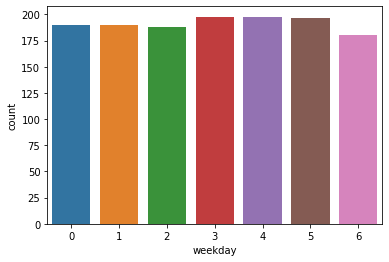

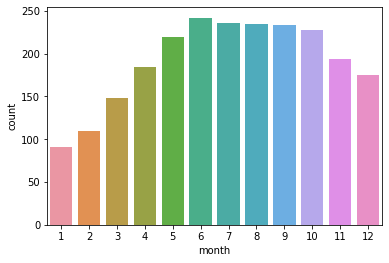

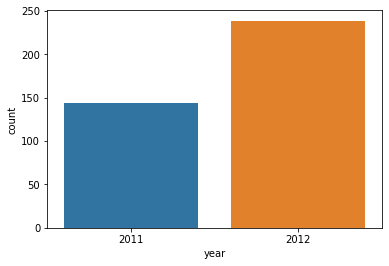

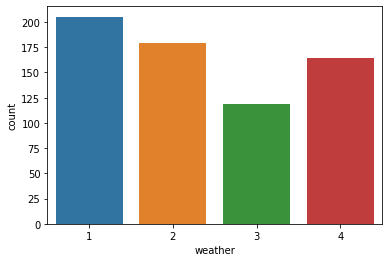

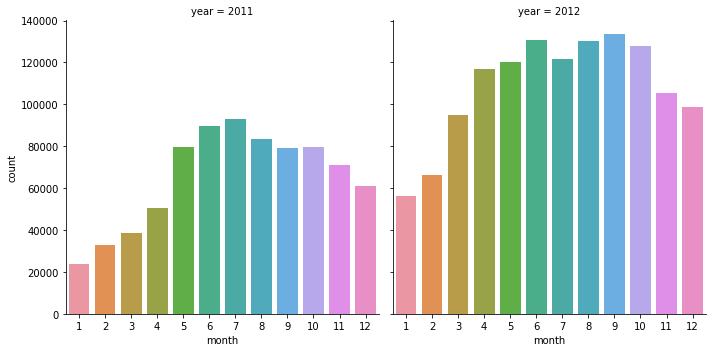

In [18]:
# Function created to plot summary of continuous variables on y axis and categorical variables on x axis
# Run below snippet to allow multiple outputs in one cell of python notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def bar_plots(input_data,x,y,method = 'sum'):
    if method == 'mean':
        summary = input_data.groupby(by = x).mean()
    else:
        summary = input_data.groupby(by = x).sum()
        
    # to obtain holiday as column in dataset instead of index, we need to reset index
    
    summary=summary.reset_index()
    sns.barplot(x=x,y=y, data=summary)
    plt.show()
    
bar_plots(bike_data,'weekday', 'count', method = 'mean')
bar_plots(bike_data,'month', 'count', method = 'mean')
bar_plots(bike_data,'year', 'count', method = 'mean')
bar_plots(bike_data,'weather', 'count', method = 'mean')

grouped_plot=bike_data.groupby(by=['year','month']).sum().reset_index()
sns.catplot(x='month',y='count', data=grouped_plot, col='year', kind='bar')

plt.show()



From the above analysis we can see that month 5 to 10 have higher renting compared to other months. Also, distribution is somewhat similar for year 2011 & 2012 with higher bike rentals in 2012.
There's not much difference in bike rentals across different weekdays

Based on the above analysis we can categorize month and weekday columns

In [19]:
# create functions to create categories of variables
def month_category(month):
    if month <= 4 or month >= 11:
        return(0)
    else:
        return(1)

def weekday_category(weekday):
    if weekday <= 2:
        return(0)
    else:
        return(1)
    
bike_data['month_cat'] = bike_data['month'].apply(lambda month: month_category(month))
bike_data['week_cat'] = bike_data['weekday'].apply(lambda weekday: weekday_category(weekday))


test_data['month_cat'] = test_data['month'].apply(lambda month: month_category(month))
test_data['week_cat'] = test_data['weekday'].apply(lambda weekday: weekday_category(weekday))


# drop the raw variables for which categories are created
bike_data = bike_data.drop(columns=['month', 'weekday'])
bike_data.head()


# drop the raw variables for which categories are created
test_data = test_data.drop(columns=['month', 'weekday'])
test_data.head()

# Update the categorical columns to include new created variables
cat_columns=['season','year','month_cat','holiday','week_cat','workingday','weather']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_cat,week_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,0,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month_cat,week_cat
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,0,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,0,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,0,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,0,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,0,1


## Feature Selection

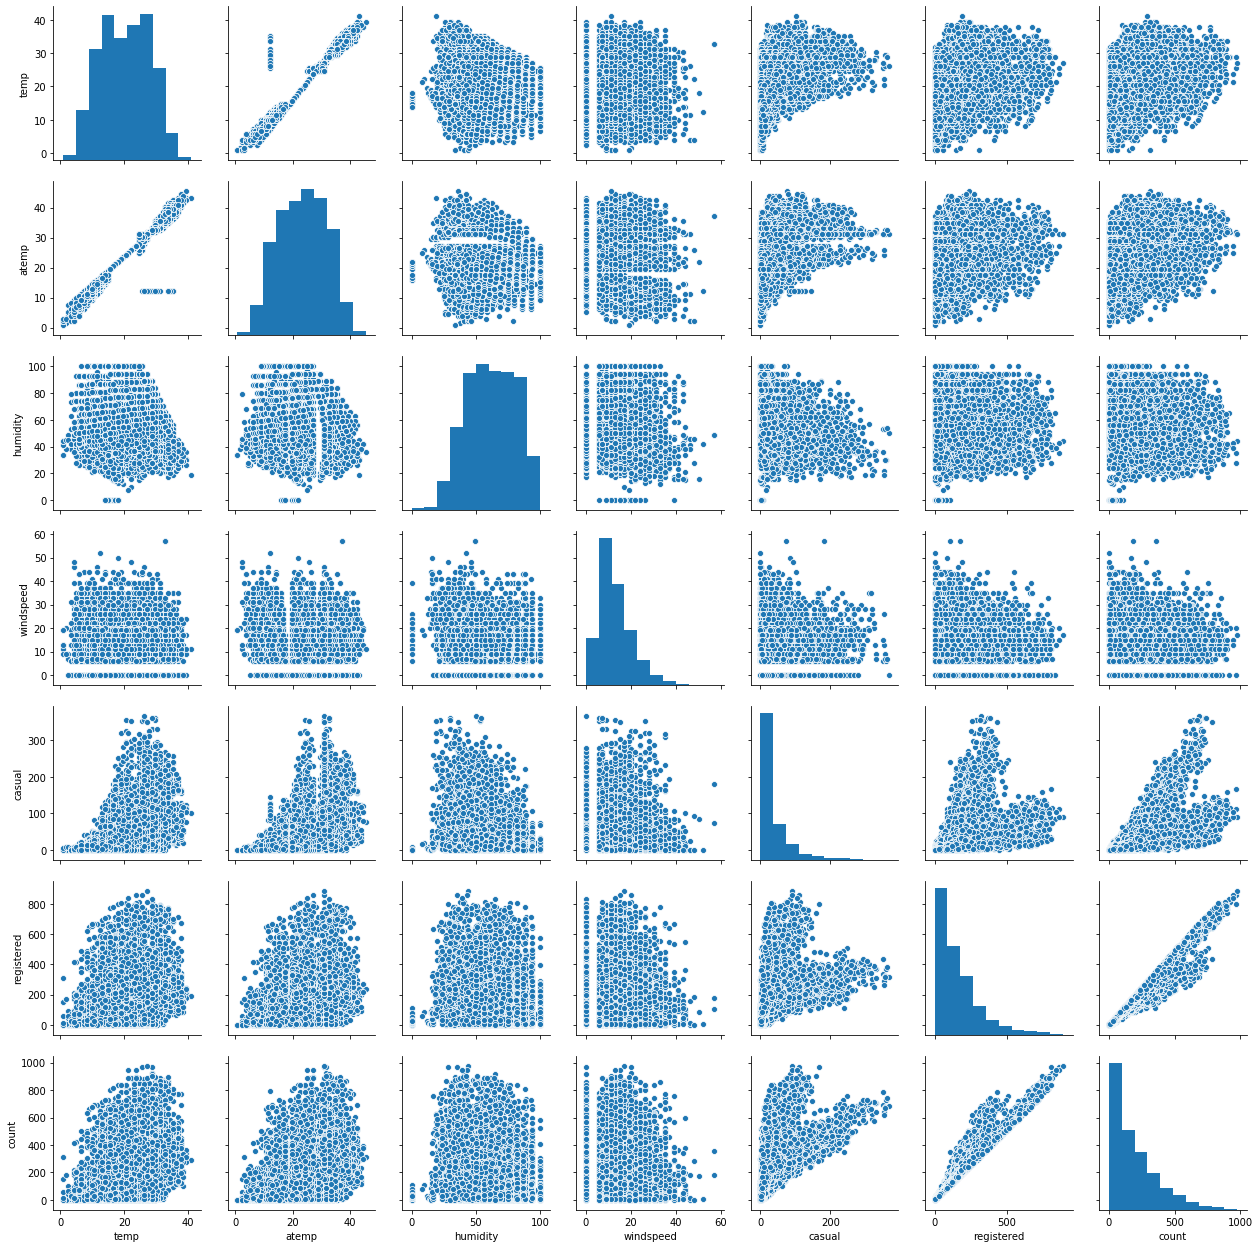

In [20]:
# Check for correlation between variables/ multi collinearity

sns.pairplot(bike_data[numeric_columns])

In [21]:
corr=bike_data[numeric_columns].corr()
corr.head()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


<Figure size 1008x720 with 0 Axes>

Text(0.5, 1.0, 'Heat map for correlation between numeric columns')

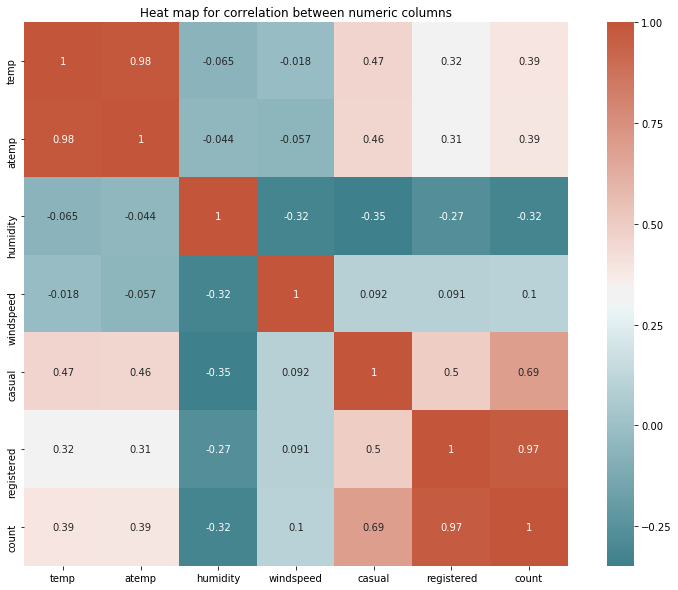

In [22]:
plt.figure(figsize=(14,10))
plt.title('Heat map for correlation between numeric columns')
sns.heatmap(corr, mask = np.zeros_like(corr,dtype = np.bool),
            square = True, annot = True, cmap = sns.diverging_palette(210, 20, as_cmap = True))

From the above analysis we can see that temp & atemp variable have high correlation indicating that one can be dropped.
We can also drop registered and casual variable and simply keep count as our dependent variable. 

Let us now analyse the independence between categorical variables with the help of Chi square test

Good reference for Chi square test is:
https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-association-independence

Null hypothesis for chi-square test:
The two variables are independent

Significance level= 0.05

If we get p values below 0.05 we would reject the null hypothesis.

In [23]:
# Making combinations of categorical columns
paired= [(col1,col2) for col1 in cat_columns for col2 in cat_columns]
print(paired)

[('season', 'season'), ('season', 'year'), ('season', 'month_cat'), ('season', 'holiday'), ('season', 'week_cat'), ('season', 'workingday'), ('season', 'weather'), ('year', 'season'), ('year', 'year'), ('year', 'month_cat'), ('year', 'holiday'), ('year', 'week_cat'), ('year', 'workingday'), ('year', 'weather'), ('month_cat', 'season'), ('month_cat', 'year'), ('month_cat', 'month_cat'), ('month_cat', 'holiday'), ('month_cat', 'week_cat'), ('month_cat', 'workingday'), ('month_cat', 'weather'), ('holiday', 'season'), ('holiday', 'year'), ('holiday', 'month_cat'), ('holiday', 'holiday'), ('holiday', 'week_cat'), ('holiday', 'workingday'), ('holiday', 'weather'), ('week_cat', 'season'), ('week_cat', 'year'), ('week_cat', 'month_cat'), ('week_cat', 'holiday'), ('week_cat', 'week_cat'), ('week_cat', 'workingday'), ('week_cat', 'weather'), ('workingday', 'season'), ('workingday', 'year'), ('workingday', 'month_cat'), ('workingday', 'holiday'), ('workingday', 'week_cat'), ('workingday', 'workin

In [24]:
# Let us set a significance level Alpha of 5% (0.05) and perform chi- square test for every combination
from scipy.stats import chi2_contingency

# help(chi2_contingency)
p_values=[]
for cols in paired:
    if cols[0]!=cols[1]:
        chi2,p,dof,expected=chi2_contingency(pd.crosstab(bike_data[cols[0]], 
                                                        bike_data[cols[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-')
p_values=np.array(p_values).reshape((len(cat_columns),len(cat_columns)))
p_values=pd.DataFrame(p_values, index=cat_columns, columns=cat_columns)
p_values.head()


,season,year,month_cat,holiday,week_cat,workingday,weather
season,-,0.932,0.0,0.0,0.71,0.463,0.0
year,0.932,-,0.758,0.231,0.534,0.812,0.004
month_cat,0.0,0.758,-,0.178,0.109,0.096,0.0
holiday,0.0,0.231,0.178,-,0.0,0.0,0.144
week_cat,0.71,0.534,0.109,0.0,-,0.0,0.0


We can drop the holiday column as it is not independent from the season & week_cat columns variable. Let us first check the feature importances before making the final decision to drop the variable.

In [25]:
# Checking importance of feature
drop_cols_x = ['datetime', 'count', 'registered', 'casual']
X = bike_data.drop(columns=drop_cols_x)
# X.head()
Y = bike_data['count']
# Y.head()

from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators = 300)
regressor.fit(X,Y)

feature_importances = pd.DataFrame({'Feature': X.columns,
                                     'Importance': regressor.feature_importances_})
feature_importances.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

,Feature,Importance
0,humidity,0.245364
1,windspeed,0.176482
2,temp,0.156829
3,atemp,0.154200
4,year,0.067483
5,season,0.061365
6,weather,0.045327
7,week_cat,0.035645
8,workingday,0.031574
9,month_cat,0.021713


The low importance of holiday in the above feature importance table justifies that we drop the variable.

Let's check the VIF of numeric variables as well to check for multi-collinearity.
Constant is not a part of the dataset, but is added so that VIF can be calculated.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

from statsmodels.tools.tools import add_constant

# you are passing dataframe that's why you need double brackets.

numeric_var_df = add_constant(bike_data[['humidity','windspeed','temp']])
numeric_var_df.head()
numeric_var_df.shape
vif = pd.Series([vf(numeric_var_df.values,i) for i in range(numeric_var_df.shape[1])], index = numeric_var_df.columns)
vif.head()


C:\Users\aditi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,humidity,windspeed,temp
0,1.0,81,0.0,9.84
1,1.0,80,0.0,9.02
2,1.0,80,0.0,9.02
3,1.0,75,0.0,9.84
4,1.0,75,0.0,9.84


(10886, 4)

const        27.378633
humidity      1.119196
windspeed     1.114830
temp          1.005907
dtype: float64

From the above table we can see that there's no multi-collinearity issue at this stage.

In [27]:
# bike_data.head(10)
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_cat,week_cat
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,0.502297,0.573673
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,0.500018,0.494565
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,1.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,1.000000,1.000000


From the above table we can see that 2 variables that are categorical but treated as int in data are weather and season.
So our next step would be to create dummies for these variables so that they can be appropriately handled in model.

In [28]:
# Making dummies for each category of season and weather

season_dummy = pd.get_dummies(bike_data['season'], drop_first = True, prefix = 'season')
# drop first used to get k-1 dummies out of k categorical levels by removing the first level.

bike_data = pd.concat([bike_data, season_dummy], axis=1)
bike_data = bike_data.drop(columns = ['season'])

season_dummy = pd.get_dummies(test_data['season'], drop_first = True, prefix = 'season')
# drop first used to get k-1 dummies out of k categorical levels by removing the first level.

test_data = pd.concat([test_data, season_dummy], axis=1)
test_data = test_data.drop(columns = ['season'])



weather_dummy = pd.get_dummies(bike_data['weather'], drop_first=True, prefix = 'weather')
bike_data = pd.concat([bike_data, weather_dummy], axis=1)
bike_data = bike_data.drop(columns = ['weather'])


weather_dummy = pd.get_dummies(test_data['weather'], drop_first=True, prefix = 'weather')
test_data = pd.concat([test_data, weather_dummy], axis=1)
test_data = test_data.drop(columns = ['weather'])

bike_data.describe()
bike_data.info()

test_data.describe()
test_data.info()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,0.502297,0.573673,0.251056,0.251056,0.251148,0.260334,0.078909,0.000092
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,0.500018,0.494565,0.433641,0.433641,0.433694,0.438837,0.269609,0.009584
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month_cat     10886 non-null int64
week_cat      10886 non-null int64
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
weather_2     10886 non-null uint8
weather_3     10886 non-null uint8
weather_4     10886 non-null uint8
dtypes: float64(3), int64(9), object(1), uint8(6)
memory usage: 1.1+ MB


,holiday,workingday,temp,atemp,humidity,windspeed,year,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.00000,6493.000000,6493.000000,6493.000000
mean,0.029108,0.685815,20.620607,24.012865,64.125212,12.631157,2011.503619,0.509934,0.574003,0.258124,0.271523,0.23071,0.263361,0.086247,0.000308
std,0.168123,0.464226,8.059583,8.782741,19.293391,8.250151,0.500025,0.499940,0.494531,0.437636,0.444780,0.42132,0.440490,0.280750,0.017549
min,0.000000,0.000000,0.820000,0.000000,16.000000,0.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,49.000000,7.001500,2011.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,21.320000,25.000000,65.000000,11.001400,2012.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,27.060000,31.060000,81.000000,16.997900,2012.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000
max,1.000000,1.000000,40.180000,50.000000,100.000000,55.998600,2012.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
datetime      6493 non-null object
holiday       6493 non-null int64
workingday    6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null int64
month_cat     6493 non-null int64
week_cat      6493 non-null int64
season_2      6493 non-null uint8
season_3      6493 non-null uint8
season_4      6493 non-null uint8
weather_2     6493 non-null uint8
weather_3     6493 non-null uint8
weather_4     6493 non-null uint8
dtypes: float64(3), int64(6), object(1), uint8(6)
memory usage: 545.4+ KB


Finalize modeling data with and without outliers. Also drop unwanted columns from the dataset.

In [29]:
# Create a copy of dataset and remove outiers from it
bike_data_wo = bike_data.copy()

for col in ['humidity','windspeed']:
    p75, p25 = np.percentile(bike_data.loc[:,col], [75,25]) 
    iqr = p75 - p25
    min = p25 - (iqr * 1.5)
    max = p75 + (iqr * 1.5)
    bike_data_wo = bike_data_wo.drop(bike_data_wo[bike_data_wo.loc[:,col]<min].index)
    bike_data_wo = bike_data_wo.drop(bike_data_wo[bike_data_wo.loc[:,col]>max].index)
    

bike_data.info() 
bike_data_wo.describe() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month_cat     10886 non-null int64
week_cat      10886 non-null int64
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
weather_2     10886 non-null uint8
weather_3     10886 non-null uint8
weather_4     10886 non-null uint8
dtypes: float64(3), int64(9), object(1), uint8(6)
memory usage: 1.1+ MB


,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,0.028671,0.680015,20.277618,23.722575,62.337187,12.284399,36.087610,155.795074,191.882685,2011.503666,0.508930,0.574638,0.251363,0.254559,0.254841,0.262549,0.075672,0.000094
std,0.166887,0.466492,7.793356,8.448536,18.900912,7.443142,49.987538,151.139015,181.238751,0.500010,0.499944,0.494421,0.433817,0.435634,0.435792,0.440040,0.264485,0.009695
min,0.000000,0.000000,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,11.001400,17.000000,118.000000,145.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.240000,31.060000,78.000000,16.997900,49.000000,223.000000,285.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,31.000900,367.000000,886.000000,977.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
# help(pd.DataFrame.drop)
bike_data.drop(columns=['datetime', 'holiday','atemp','casual','registered','year'], inplace = True)
bike_data_wo.drop(columns=['datetime', 'holiday','atemp','casual','registered','year'], inplace = True)

test_data.drop(columns=['datetime', 'holiday','atemp','year'], inplace = True)

KeyError: "['datetime' 'holiday' 'atemp' 'casual' 'registered' 'year'] not found in axis"

In [31]:
bike_data.head()
bike_data_wo.head()

test_data.head()

print("Shape of original dataset:", bike_data.shape)
print("Shape of dataset after removing outliers:", bike_data_wo.shape)
print("Shape of test dataset:", test_data.shape)

,workingday,temp,humidity,windspeed,count,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,9.84,81,0.0,16,0,1,0,0,0,0,0,0
1,0,9.02,80,0.0,40,0,1,0,0,0,0,0,0
2,0,9.02,80,0.0,32,0,1,0,0,0,0,0,0
3,0,9.84,75,0.0,13,0,1,0,0,0,0,0,0
4,0,9.84,75,0.0,1,0,1,0,0,0,0,0,0


,workingday,temp,humidity,windspeed,count,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,9.84,81,0.0,16,0,1,0,0,0,0,0,0
1,0,9.02,80,0.0,40,0,1,0,0,0,0,0,0
2,0,9.02,80,0.0,32,0,1,0,0,0,0,0,0
3,0,9.84,75,0.0,13,0,1,0,0,0,0,0,0
4,0,9.84,75,0.0,1,0,1,0,0,0,0,0,0


,workingday,temp,humidity,windspeed,month_cat,week_cat,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,1,10.66,56,26.0027,0,1,0,0,0,0,0,0
1,1,10.66,56,0.0000,0,1,0,0,0,0,0,0
2,1,10.66,56,0.0000,0,1,0,0,0,0,0,0
3,1,10.66,56,11.0014,0,1,0,0,0,0,0,0
4,1,10.66,56,11.0014,0,1,0,0,0,0,0,0


Shape of original dataset: (10886, 13)
Shape of dataset after removing outliers: (10638, 13)
Shape of test dataset: (6493, 12)


## Building Models

Let's get to the most interesting part now of building models and evaluating them.

In [141]:
# Let's split the dataset into training and validation data at this stage

x = bike_data.drop(columns=['count'])
y = bike_data['count']

x_wo = bike_data_wo.drop(columns=['count'])
y_wo = bike_data_wo['count']

# x.describe()
# y.describe()

# x_wo.describe()
# y_wo.describe()

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_wo_train, x_wo_val, y_wo_train, y_wo_val = train_test_split(x_wo, y_wo, test_size = 0.2, random_state = 0)


# x_train.describe()
# y_train.describe()
# x_val.describe()


In [145]:
# Create a function to build model on training data and provide cross validation score and score on test and train data

from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score

def fit_and_score(regressor,x_train,y_train,x_test,y_test):
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
  
    #print(y_test)
    #print(y_pred)
    ten_performances = cross_val_score(regressor, x_train, y_train, cv = 10, scoring = 'explained_variance' )
    # print(ten_performances)
    k_fold_performance = ten_performances.mean()
    print("k-fold (k=10) explained variance")
    print("="*50)
    print(k_fold_performance)
    print()
    
    print("on training data explained variance")    
    print("="*50)
    print(regressor.score(x_train,y_train))
    print()
    
    print("on test data explained variance")    
    print("="*50)
    print(regressor.score(x_test,y_test))
    print()

In [136]:
def fit_and_score(regressor,x_train,y_train,x_test,y_test):
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    print(x_train)
    y_train
    

### Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
fit_and_score(regressor, x_train, y_train, x_val, y_val)

regressor2 = LinearRegression()
fit_and_score(regressor2, x_wo_train, y_wo_train, x_wo_val, y_wo_val)

k-fold (k=10) explained variance
0.2744651464049888

on training data explained variance
0.2774117706869097

on test data explained variance
0.27113180035188345

k-fold (k=10) explained variance
0.27686617827680116

on training data explained variance
0.27960422820205844

on test data explained variance
0.2826103062838897



### kNN

In [124]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 50)
fit_and_score(regressor,x_train, y_train, x_val, y_val)

regressor = KNeighborsRegressor(n_neighbors = 50)
fit_and_score(regressor, x_wo_train, y_wo_train, x_wo_val, y_wo_val)

k-fold (k=10) explained variance
0.2767281286650126

on training data explained variance
0.3081083071414634

on test data explained variance
0.27754260685062415

k-fold (k=10) explained variance
0.28059625163363666

on training data explained variance
0.31002768703030326

on test data explained variance
0.2633364388733702



### SVM

In [54]:
from sklearn.svm import SVR

regressor = SVR()
fit_and_score(regressor, x_train, y_train, x_val, y_val)

regressor = SVR()
fit_and_score(regressor, x_wo_train, y_wo_train, x_wo_val, y_wo_val)

C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

k-fold (k=10) explained variance
0.05863167637735728

on training data explained variance
0.000319509235776394

on test data explained variance
-0.015966995083080304



C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

k-fold (k=10) explained variance
0.06026819563179455

on training data explained variance
0.0030206715112433002

on test data explained variance
-0.01336529937362041



### Decision Tree Regression

In [83]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 1)
fit_and_score(regressor,x_train, y_train, x_val, y_val)

regressor = DecisionTreeRegressor(random_state = 1)
fit_and_score(regressor, x_wo_train, y_wo_train, x_wo_val, y_wo_val)

k-fold (k=10) explained variance
-0.14900458086331253

on training data explained variance
0.934659258488656

on test data explained variance
-0.14371608499828215

k-fold (k=10) explained variance
-0.1445343386397177

on training data explained variance
0.9350094479651052

on test data explained variance
-0.08260002747824924



### Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 2000, random_state=1)
fit_and_score(regressor,x_train, y_train, x_val, y_val)

regressor = RandomForestRegressor(n_estimators= 2000, random_state = 1)
fit_and_score(regressor, x_wo_train, y_wo_train, x_wo_val, y_wo_val)

k-fold (k=10) explained variance
0.3305775906337938

on training data explained variance
0.8652277993880058

on test data explained variance
0.3329779887119252

k-fold (k=10) explained variance
0.33569849307013

on training data explained variance
0.8663837167162669

on test data explained variance
0.3143313790573593



## Hyper parameter tuning

In [155]:
# tuning random forest 

from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(random_state=1)
params = [{'n_estimators': [500,600,800], 'max_features': ['auto','sqrt','log2'], 'min_samples_split': [2,4,6],
            'max_depth': [12,14,16], 'min_samples_leaf': [2,3,5], 'random_state': [1] }]

grid_search = GridSearchCV(estimator = regressor, param_grid = params, cv = 5, scoring = 'explained_variance', n_jobs =-1)

grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)


{'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 1}


In [158]:
# building random forest on tuned parameters

regressor= RandomForestRegressor(random_state=1, max_depth = 14, n_estimators = 500, max_features = 'sqrt', 
                                 min_samples_leaf = 2, min_samples_split = 2 )
fit_and_score(regressor,x_train, y_train, x_val, y_val)

k-fold (k=10) explained variance
0.39009518607380145

on training data explained variance
0.6388643406524095

on test data explained variance
0.3824737591136942



Plotting scatter graph for actual and predicted of tuned random forest model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'scatter graph between actual and predicted')

Text(0.5, 0, 'y_true')

Text(0, 0.5, 'y_pred')

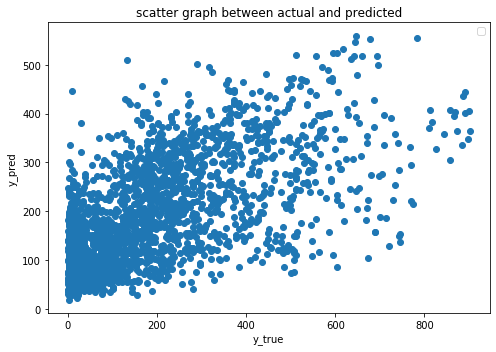

In [159]:
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_val)

fig,ax = plt.subplots(figsize=(7,5))

ax.scatter(y_test,y_pred)
ax.legend()
plt.title("scatter graph between actual and predicted")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.tight_layout()
plt.show()

In [172]:
count = pd.DataFrame({'count':regressor.predict(test_data)})
print(count)
# count.columns=['count']

           count
0     110.368509
1      67.810076
2      67.810076
3      93.586332
4      93.586332
5     106.658290
6     101.633647
7      95.374442
8      95.677467
9      77.644611
10    117.299816
11    121.790450
12    129.577376
13    121.973035
14    139.164957
15    146.883979
16    122.785862
17    121.275557
18     93.321390
19     99.804141
20    116.886093
21     90.303474
22    105.794077
23    107.578097
24     91.353669
25     91.353669
26     76.279099
27     58.517718
28     94.472410
29    117.035470
...          ...
6463   83.287471
6464   84.903815
6465   79.070762
6466   58.535527
6467   59.970803
6468   69.379586
6469   67.220526
6470   67.220526
6471   83.152327
6472   74.170849
6473   48.569983
6474   77.812341
6475   81.941564
6476   74.684729
6477   65.663772
6478   62.762013
6479   83.191512
6480  112.717506
6481  114.108146
6482  112.421205
6483  105.683317
6484  108.065733
6485  101.892210
6486  112.204618
6487  104.698390
6488  122.261729
6489  122.2617

In [173]:
new_test_data=pd.read_csv('test.csv')
new_test_data.head()
new_test=new_test_data.loc[:,'datetime']
new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


0    2011-01-20 00:00:00
1    2011-01-20 01:00:00
2    2011-01-20 02:00:00
3    2011-01-20 03:00:00
4    2011-01-20 04:00:00
Name: datetime, dtype: object

In [174]:
submission_dataset=pd.concat([new_test,count], axis=1)
submission_dataset.head()

,datetime,count
0,2011-01-20 00:00:00,110.368509
1,2011-01-20 01:00:00,67.810076
2,2011-01-20 02:00:00,67.810076
3,2011-01-20 03:00:00,93.586332
4,2011-01-20 04:00:00,93.586332


In [176]:
submission_dataset.to_csv('submission.csv', index = False)

# %ls